# Decisive Probability Distributions

In this activity, you’ll use the Alpaca API to gather pricing information for six stocks. Then, you’ll use this information to plot probability distributions for the daily returns of the stocks. Finally, you’ll determine the most and the least volatile stocks.
Instructions:

1. Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

2. Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers:

    - `SPY` (SPDR S&P 500 ETF Trust)

    - `LUV` (Southwest Airlines)

    - `DIS` (Disney) 

    - `AAPL` (Apple)

    - `SBUX` (Starbucks)

    - `ZM` (Zoom)

> **Hint** Remember to set the tickers, time frame, start and end dates (‘2019-05-01’ and ‘2020-05-01’) and the number of rows returned. Then use the Alpaca `get_barset` function to make the API call. Be sure to set the `df` property at the end of the `get_barset` function so that the API response is returned as a DataFrame.

5. Create a new DataFrame that holds the closing prices of each stock.

6. Generate a daily returns DataFrame that’s based on the closing prices of each stock.

7. Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

> **Hint** Generate only two plots. Both the histogram and the density plot will show the data for all six stocks.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas Histogram plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[Pandas Density plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)

## Import the required libraries and dependencies

In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline

## Step 1: Create your `.env` file at the root of your Unsolved folder. It should include your Alpaca API and secret keys. 

## Step 2: Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()


True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))
    

str

str

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


## Step 4: Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers: SPY, LUV, DIS, AAPL, SBUX, and ZM. 

* Create the list for the required `tickers`
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2019-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_barset` function. 

In [5]:
# Create the list for the required tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "ZM"]
tickers


['SPY', 'LUV', 'DIS', 'AAPL', 'SBUX', 'ZM']

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
print(start_date)
print(end_date)


2019-05-01T00:00:00-04:00
2020-05-01T00:00:00-04:00


In [7]:
# Set timeframe to one day (1D)
timeframe = '1D'
print(timeframe)

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000
print(limit_rows)


1D
1000


In [8]:
# Use the Alpaca get_barset function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Review the first five rows of the resulting DataFrame 
prices_df.head()


AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2019-05-01 00:00:00-04:00  209.88  215.3100  209.230  210.52  57751414   
2019-05-02 00:00:00-04:00  209.84  212.6500  208.130  209.17  29014844   
2019-05-03 00:00:00-04:00  210.74  211.8400  210.230  211.78  17987793   
2019-05-06 00:00:00-04:00  204.29  208.8400  203.500  208.60  28949691   
2019-05-07 00:00:00-04:00  205.88  207.4175  200.825  202.86  34328425   

                              DIS                                     ...  \
                             open    high      low   close    volume  ...   
time                                                                  ...   
2019-05-01 00:00:00-04:00  137.49  138.17  136.235  136.32   7588692  ...   
2019-05-02 00:00:00-04:00  135.38  135.69  132.380  134.19  14963432  ...   
2019-05-03 00:00:00-04:00  135.22  135.31  133.780  134.28   8073628  ...   
2019-05-06 00:00:00-04:00  132.54  135.33  132.300  135.05   8946397  ...   
2019-05-07 00:00:00-04:00  135.35  135.97  132.760  133.47   9737952  ...   

                              SPY                                        ZM  \
                             open    high     low   close     volume   open   
time                                                                          
2019-05-01 00:00:00-04:00  294.72  294.95  291.80  291.84   59432706  72.72   
2019-05-02 00:00:00-04:00  291.68  292.70  289.52  291.27   59209780  72.75   
2019-05-03 00:00:00-04:00  292.82  294.34  292.56  294.02   45416907  75.09   
2019-05-06 00:00:00-04:00  289.25  293.31  288.90  292.87   75426654  75.01   
2019-05-07 00:00:00-04:00  290.15  290.81  285.81  288.04  118960368  77.85   

                                                           
                            high      low  close   volume  
time                                                       
2019-05-01 00:00:00-04:00  76.95  70.8159  72.55  3226692  
2019-05-02 00:00:00-04:00  75.89  69.6912  75.58  2441372  
2019-05-03 00:00:00-04:00  80.25  75.0000  79.10  2537793  
2019-05-06 00:00:00-04:00  80.79  74.5000  78.13  2026295  
2019-05-07 00:00:00-04:00  78.05  73.2500  73.32  1925361  

[5 rows x 30 columns]

## Step 5: Create a new DataFrame that holds the closing prices of each stock.

1. Create a `closing_prices_df` DataFrame.
2. Using a for-loop, for every `ticker` in the `tickers` list, select the `close` price for each ticker in the `prices_df` Dataframe. That expression will be set equal to  the new `closing_prices_df` for the same `ticker`.
3. For the new closing_prices_df DataFrame, keep only the date component (drop the time component).
4. View the `closing_prices_df` DataFrame. 

In [9]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = pd.DataFrame()

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
for ticker in tickers:
    closing_prices_df[ticker] = prices_df[ticker]["close"]

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame
display(closing_prices_df.head())
display(closing_prices_df.tail())


,SPY,LUV,DIS,AAPL,SBUX,ZM
2019-05-01,291.84,53.89,136.32,210.52,77.51,72.55
2019-05-02,291.27,53.37,134.19,209.17,77.46,75.58
2019-05-03,294.02,53.62,134.28,211.78,78.06,79.10
2019-05-06,292.87,53.48,135.05,208.60,78.06,78.13
2019-05-07,288.04,52.20,133.47,202.86,77.96,73.32


,SPY,LUV,DIS,AAPL,SBUX,ZM
2020-04-27,287.11,29.105,106.03,283.25,77.7500,164.55
2020-04-28,285.77,29.720,106.24,278.57,78.6900,156.61
2020-04-29,293.19,30.970,112.31,287.83,76.9000,146.46
2020-04-30,290.39,31.240,108.05,293.99,76.7400,135.11
2020-05-01,282.73,29.230,105.50,289.07,73.7937,138.61


## Step 6: Generate a daily returns DataFrame that’s based on the closing prices of each stock.

In [10]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
daily_returns_df = closing_prices_df.pct_change().dropna()

# Review the first and last five rows of the daily_returns_df DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())


,SPY,LUV,DIS,AAPL,SBUX,ZM
2019-05-02,-0.001953,-0.009649,-0.015625,-0.006413,-0.000645,0.041764
2019-05-03,0.009441,0.004684,0.000671,0.012478,0.007746,0.046573
2019-05-06,-0.003911,-0.002611,0.005734,-0.015016,0.000000,-0.012263
2019-05-07,-0.016492,-0.023934,-0.011699,-0.027517,-0.001281,-0.061564
2019-05-08,-0.001666,0.004406,0.010564,0.000197,0.001026,0.060284


,SPY,LUV,DIS,AAPL,SBUX,ZM
2020-04-27,0.014380,-0.007671,0.048033,0.001060,0.028602,0.036535
2020-04-28,-0.004667,0.021130,0.001981,-0.016523,0.012090,-0.048253
2020-04-29,0.025965,0.042059,0.057135,0.033241,-0.022747,-0.064811
2020-04-30,-0.009550,0.008718,-0.037931,0.021402,-0.002081,-0.077496
2020-05-01,-0.026378,-0.064341,-0.023600,-0.016735,-0.038393,0.025905


## Step 7: Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

In [11]:
# Using the Pandas describe function, generate summary statistics
# for each of the tickers in the daily_returns_df DataFrame
daily_returns_df.describe()


,SPY,LUV,DIS,AAPL,SBUX,ZM
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.000082,-0.001991,-0.000683,0.001589,0.000169,0.003503
std,0.020320,0.028888,0.025705,0.025865,0.026980,0.043823
min,-0.115916,-0.150895,-0.129846,-0.131590,-0.166167,-0.152639
25%,-0.004667,-0.008864,-0.009786,-0.009062,-0.010208,-0.017752
50%,0.000577,-0.000182,0.000272,0.001144,0.000846,0.000576
75%,0.006877,0.008981,0.008845,0.013612,0.009759,0.021420
max,0.094737,0.144441,0.142840,0.121210,0.148646,0.223619


## Step 8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

<AxesSubplot:title={'center':'Daily Returns Histogram'}, ylabel='Frequency'>

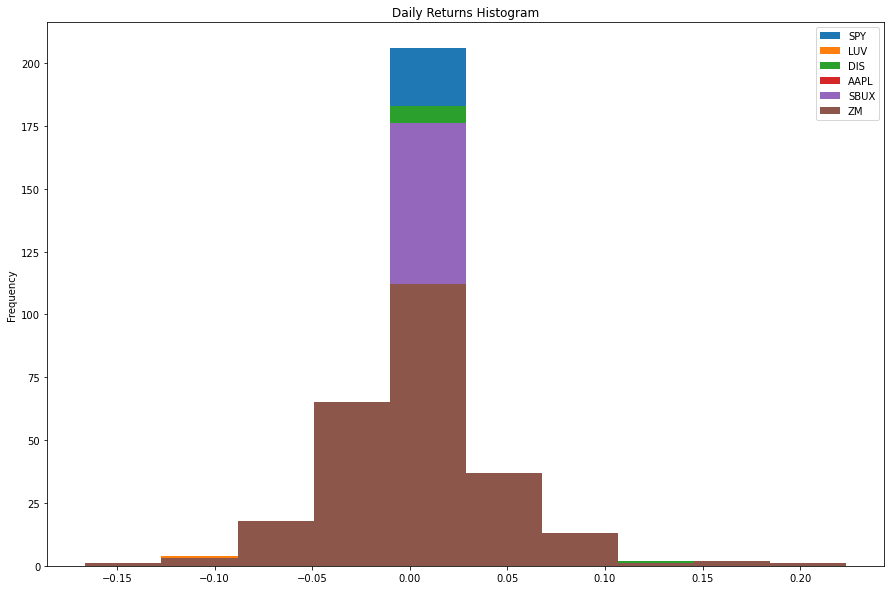

In [12]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Give the plot a title and adjust the figure size
daily_returns_df.plot(
    kind="hist",  
    figsize=(15,10),
    title="Daily Returns Histogram"
)


<AxesSubplot:title={'center':'Daily Returns Density Plot'}, ylabel='Density'>

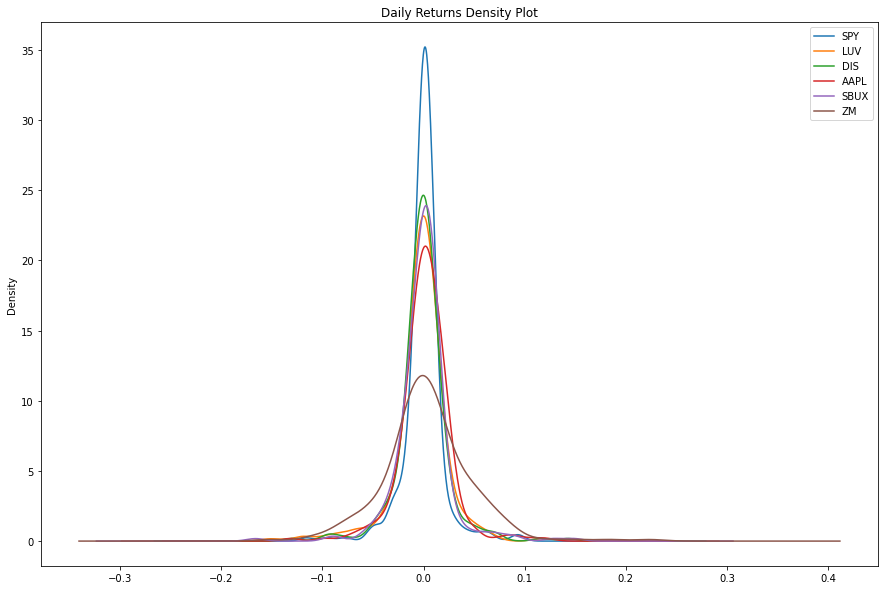

In [13]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size
daily_returns_df.plot.density(
    figsize=(15,10), 
    title="Daily Returns Density Plot"
)


## Reflect on the following question:

**Question:** After analyzing the summary statistics, histogram, and density plot for the SPY, LUV, DIS, AAPL, SBUX, and ZM stocks, which do you think is the most volatile stock based on the daily return data? Which is the least volatile?
    
**Answer:** The most volatile stock is ZM, Zoom Video Communications. The least volatile stock is SPY, SPDR S&P 500 ETF Trust. 